In [1]:
# import all the libraries 
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset=pd.read_csv("/content/drive/MyDrive/data/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


In [6]:
text= dataset.to_string()
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

In [9]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)
print(len(tokenized_text))

["Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world.", 'By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event.', 'Amazon can understand user feedback or review on the specific product.', "BookMyShow can discover people's opinion about the movie.", 'Youtube can also analyze and understand peoples viewpoints on a video.]', 'Index: []']
6


In [8]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']
75


task2:word cloud

In [40]:
import collections # word frequency statistics library
import numpy as np # numpy data processing library
import wordcloud # word cloud display library
from PIL import Image # Image processing library
import matplotlib.pyplot as plt # Image library

In [41]:
word_list = []
remove_words = ['.',':','[',']']

for word in tokenized_word: # Read each word in a loop
    if word not in remove_words:
        word_list.append(word) # word append to list

# Word frequency statistics
word_counts = collections.Counter(word_list) # Do word frequency statistics for word segmentation
print (word_counts) 


Counter({'on': 4, 'can': 4, "'s": 2, 'and': 2, 'peoples': 2, 'a': 2, 'understand': 2, 'the': 2, 'Empty': 1, 'DataFrame': 1, 'Columns': 1, 'Text': 1, 'Analytics': 1, 'has': 1, 'lots': 1, 'of': 1, 'applications': 1, 'in': 1, 'today': 1, 'online': 1, 'world': 1, 'By': 1, 'analyzing': 1, 'tweets': 1, 'Twitter': 1, ',': 1, 'we': 1, 'find': 1, 'trending': 1, 'news': 1, 'reaction': 1, 'particular': 1, 'event': 1, 'Amazon': 1, 'user': 1, 'feedback': 1, 'or': 1, 'review': 1, 'specific': 1, 'product': 1, 'BookMyShow': 1, 'discover': 1, 'people': 1, 'opinion': 1, 'about': 1, 'movie': 1, 'Youtube': 1, 'also': 1, 'analyze': 1, 'viewpoints': 1, 'video': 1, 'Index': 1})


In [42]:
mask = np.array(Image.open('/content/drive/MyDrive/pic/Snorlax.png')) # Define word frequency context
wc = wordcloud.WordCloud(
    mask=mask, # set background image
    max_words=50, # maximum number of words displayed
    max_font_size=300 # font max
)

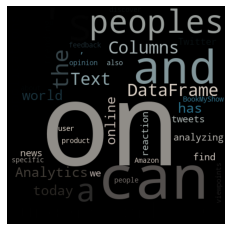

In [43]:
wc.generate_from_frequencies(word_counts) # Generate word from dictionary
image_colors = wordcloud.ImageColorGenerator(mask) # Create a color scheme from a background image
wc.recolor(color_func=image_colors) # Set word cloud color as background image scheme
plt.imshow(wc) # Show word cloud
plt.axis('off') # Close the axes
plt.show() # display image

task3:Lexical normalization

In [88]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

raw_text = text

raw_words = nltk.word_tokenize(raw_text)

print(raw_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']


In [90]:
filtered_words=[]

for word in raw_words:
    if word not in stopwords.words('english'):
        filtered_words.append(word)


wordnet_lematizer = WordNetLemmatizer()
output_words=[]
for word in filtered_words:
    temp=wordnet_lematizer.lemmatize(word)
    output_words.append(temp)

print('input：', raw_text)
print('output：', output_words)

input： Empty DataFrame
Columns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]
Index: []
output： ['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'lot', 'application', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweet', 'Twitter', ',', 'find', 'trending', 'news', 'people', 'reaction', 'particular', 'event', '.', 'Amazon', 'understand', 'user', 'feedback', 'review', 'specific', 'product', '.', 'BookMyShow', 'discover', 'people', "'s", 'opinion', 'movie', '.', 'Youtube', 'also', 'analyze', 'understand', 'people', 'viewpoint', 'video', '.', ']', 'Index', ':', '[', ']']
